In [1]:
try:
    import SEM_Image as SI
    import numpy as np
    
except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade matplotlib tifffile

Select the .tif file that you want to analyse.

Angle of rotation: 0
blackwhite = [0.126953125, 0.869140625]
Threshold Level = 0.572265625


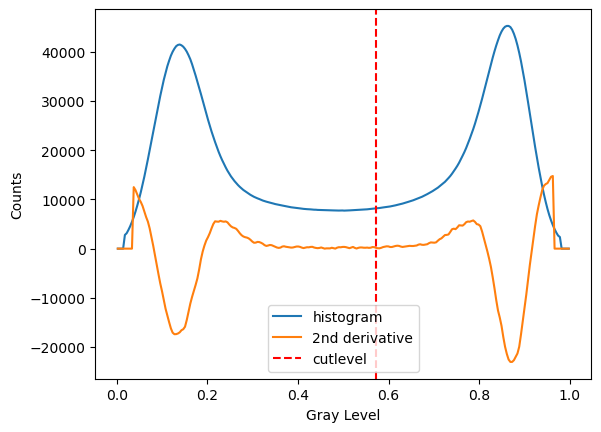

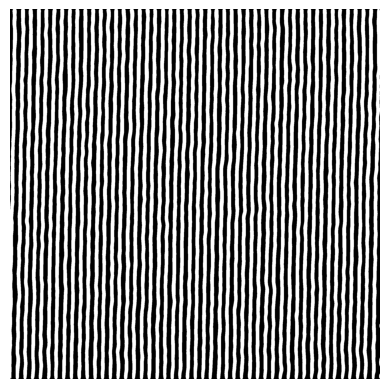

1


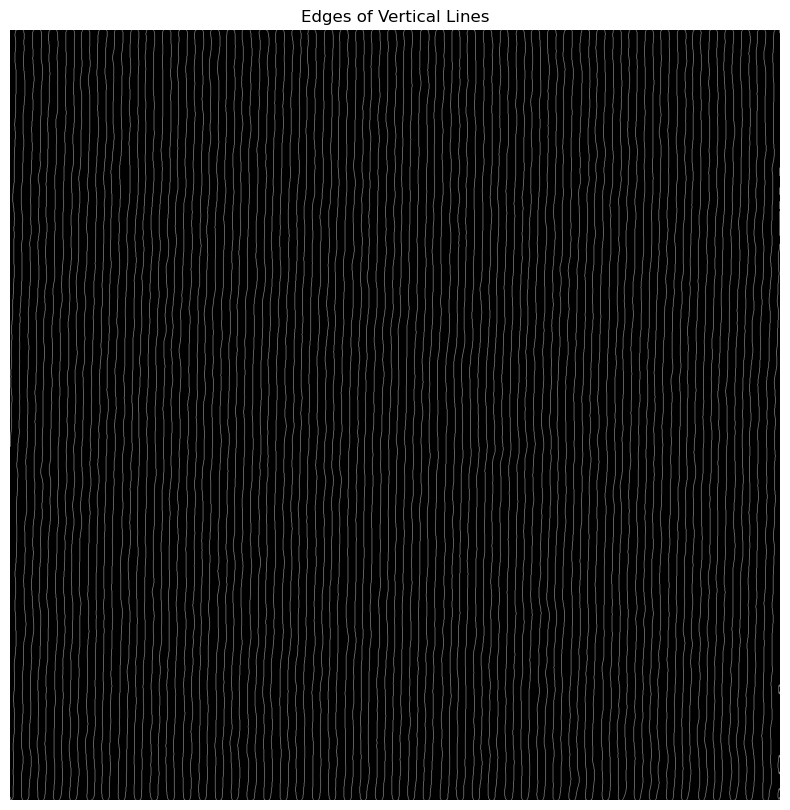

In [2]:
Image = SI.SEMImageDetails()  # Initializes all the variables for the object
Image()  # This will run all the analysis

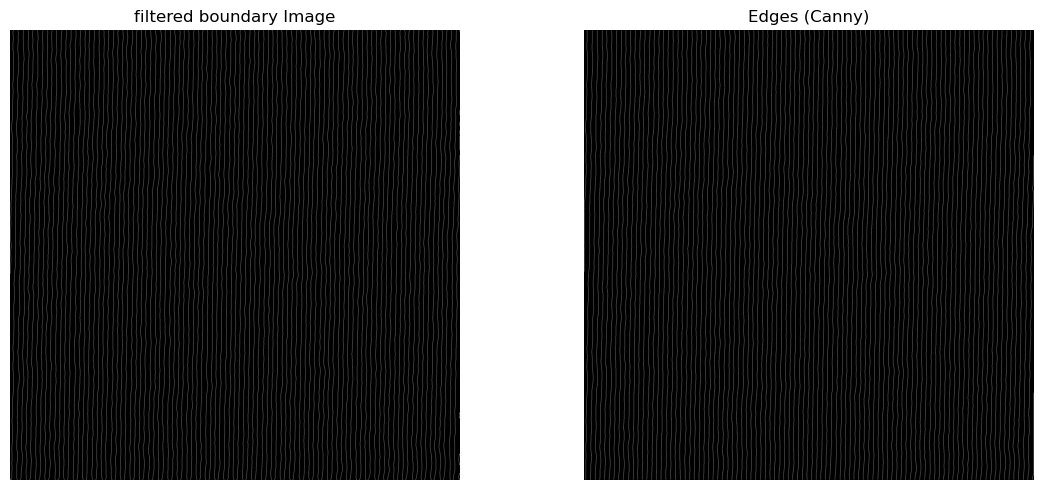

In [4]:
import matplotlib.pyplot as plt
from skimage import feature, filters

# Apply Canny edge detector to find edges
edges_canny = feature.canny(Image.image_flat, sigma=8, use_quantiles=True)

# Apply Sobel edge detector to find edges
edges_sobel = filters.sobel(Image.image_flat)

# Set appropriate thresholds for binary conversion
threshold_canny = 0.1  # Adjust this threshold as needed
threshold_sobel = 0.1  # Adjust this threshold as needed

# Convert edges to binary images based on the thresholds
binary_canny = (np.where(edges_canny > threshold_canny,1,0)).astype(np.uint8)
binary_sobel = (np.where(edges_sobel > threshold_sobel,1,0)).astype(np.uint8)

plt.figure(figsize=(12, 5))
# Display the original grayscale image and the edges using Canny and Sobel
plt.subplot(1, 2, 1)
plt.imshow(Image.image_boundaries, cmap='gray')
plt.title('filtered boundary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_canny, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

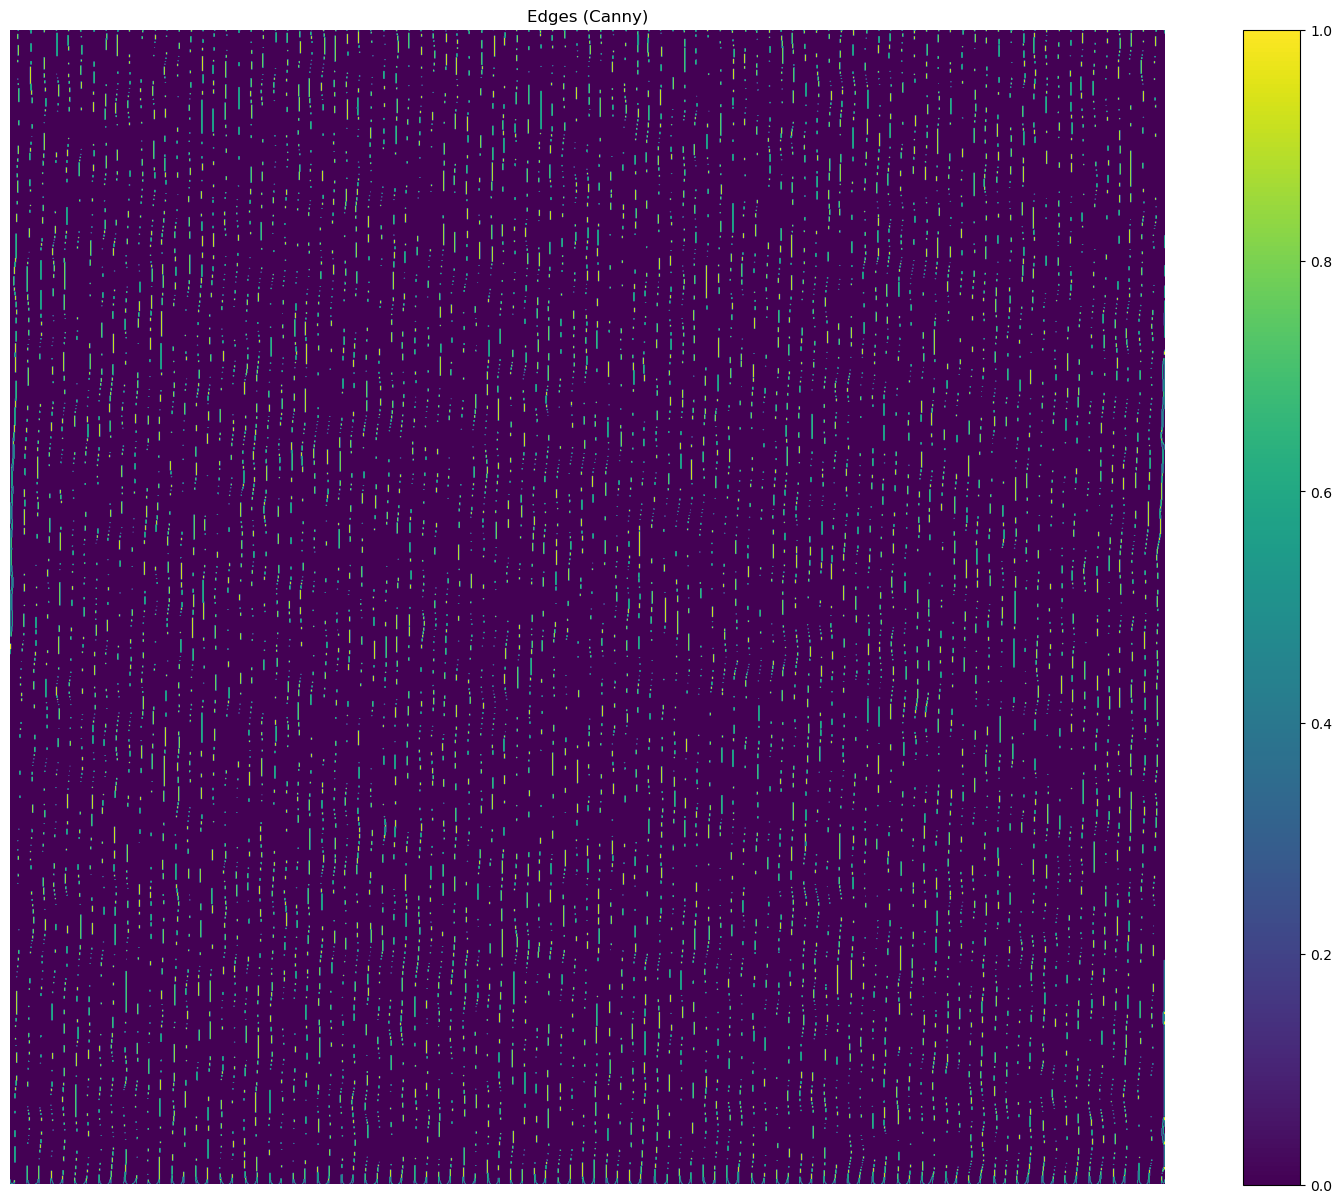

In [4]:
plt.figure(figsize=(20, 15))
plt.imshow((((Image.image_boundaries) - binary_canny))**2)
plt.title('Edges (Canny)')
plt.colorbar()
plt.axis('off')

plt.show()

In [5]:
mse = np.mean(((Image.image_boundaries) - binary_canny) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.028847335990370076


In [6]:
mse = np.mean((binary_canny - Image.image_clipped) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3350914949133601


In [7]:
mse = np.mean(((Image.image_boundaries) - Image.image_clipped) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.33464450823828296
